In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_csv('FRA.csv')

#Glimpse of Data
Company.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [3]:
Company.columns = Company.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [4]:
Company.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted_EPS  Total_liabilities  PE_on_BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [5]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [6]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [7]:
Company.describe()

Num  Networth_Next_Year  Total_assets      Net_worth  \
count  4256.000000         4256.000000  4.256000e+03    4256.000000   
mean   2128.500000         1344.740883  3.573617e+03    1351.949601   
std    1228.745702        15936.743168  3.007444e+04   12961.311651   
min       1.000000       -74265.600000  1.000000e-01       0.000000   
25%    1064.750000            3.975000  9.130000e+01      31.475000   
50%    2128.500000           72.100000  3.155000e+02     104.800000   
75%    3192.250000          330.825000  1.120800e+03     389.850000   
max    4256.000000       805773.400000  1.176509e+06  613151.600000   

       Total_income  Change_in_stock  Total_expenses  Profit_after_tax  \
count  4.025000e+03      3706.000000    4.091000e+03       4102.000000   
mean   4.688190e+03        43.702482    4.356301e+03        295.050585   
std    5.391895e+04       436.915048    5.139809e+04       3079.902071   
min    0.000000e+00     -3029.400000   -1.000000e-01      -3908.300000   
25%    1.071000e+02        -1.800000    9.680000e+01          0.500000   
50%    4.551000e+02         1.600000    4.268000e+02          9.000000   
75%    1.485000e+03        18.400000    1.395700e+03         53.300000   
max    2.442828e+06     14185.500000    2.366035e+06     119439.100000   

              PBDITA            PBT  ...  Debtors_turnover  \
count    4102.000000    4102.000000  ...       3871.000000   
mean      605.940639     410.259044  ...         17.929029   
std      5646.230633    4217.415307  ...         90.164435   
min      -440.700000   -3894.800000  ...          0.000000   
25%         6.925000       0.800000  ...          3.810000   
50%        36.900000      12.600000  ...          6.470000   
75%       158.700000      74.175000  ...         11.850000   
max    208576.500000  145292.600000  ...       3135.200000   

       Finished_goods_turnover  WIP_turnover  Raw_material_turnover  \
count              3382.000000   3492.000000            3828.000000   
mean                 84.369988     28.684513              17.733926   
std                 562.637359    169.650915             343.125864   
min                  -0.090000     -0.180000              -2.000000   
25%                   8.190000      5.100000               3.020000   
50%                  17.320000      9.860000               6.410000   
75%                  40.012500     20.240000              11.822500   
max               17947.600000   5651.400000           21092.000000   

       Shares_outstanding  Equity_face_value            EPS   Adjusted_EPS  \
count        3.446000e+03        3446.000000    4256.000000    4256.000000   
mean         2.376491e+07       -1094.828671    -196.217467    -197.527608   
std          1.709790e+08       34101.358644   13061.953425   13061.929512   
min         -2.147484e+09     -999998.900000 -843181.820000 -843181.820000   
25%          1.308382e+06          10.000000       0.000000       0.000000   
50%          4.750000e+06          10.000000       1.490000       1.240000   
75%          1.090602e+07          10.000000      10.000000       7.615000   
max          4.130401e+09      100000.000000   34522.530000   34522.530000   

       Total_liabilities     PE_on_BSE  
count       4.256000e+03   1629.000000  
mean        3.573617e+03     55.462290  
std         3.007444e+04   1304.445296  
min         1.000000e-01  -1116.640000  
25%         9.130000e+01      2.970000  
50%         3.155000e+02      8.690000  
75%         1.120800e+03     17.000000  
max         1.176509e+06  51002.740000  

[8 rows x 51 columns]

In [8]:
Company.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

In [9]:
#Columns with missing values
print(np.where(Company.isnull().sum()>0))

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       22, 23, 25, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 50], dtype=int64),)


In [10]:
Company.iloc[:,50].isnull().sum()

2627

In [11]:
cols_missing=Company.isnull().sum()[Company.isnull().sum()>0].index
cols_missing

Index(['Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'Sales',
       'Income_from_fincial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Deferred_tax_liability',
       'Cumulative_retained_profits', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Equity_face_value',
       'PE_on_BSE'],
      dtype='object')

In [12]:
col=list(Company)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Company = pd.DataFrame(imputer.fit_transform(Company))
Company.columns=col
Company.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0  1.0               395.3         827.6      336.5         534.1   
1  2.0                36.2          67.7       24.3         137.9   
2  3.0                84.0         238.4       78.9         331.2   
3  4.0              2041.4        6883.5     1443.3        8448.5   
4  5.0                41.8          90.9       47.0         388.6   

   Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0              5.65                     3.99          3.37   
1              6.47                    17.32          9.86   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                   6.41           4750000.0               10.0   0.00   
2                   8.35           4750000.0               10.0   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted_EPS  Total_liabilities  PE_on_BSE  
0          4.44              827.6       8.69  
1          0.00               67.7       8.69  
2          0.00              238.4       8.69  
3         17.60             6883.5       8.69  
4         -6.52               90.9       8.69  

[5 rows x 51 columns]

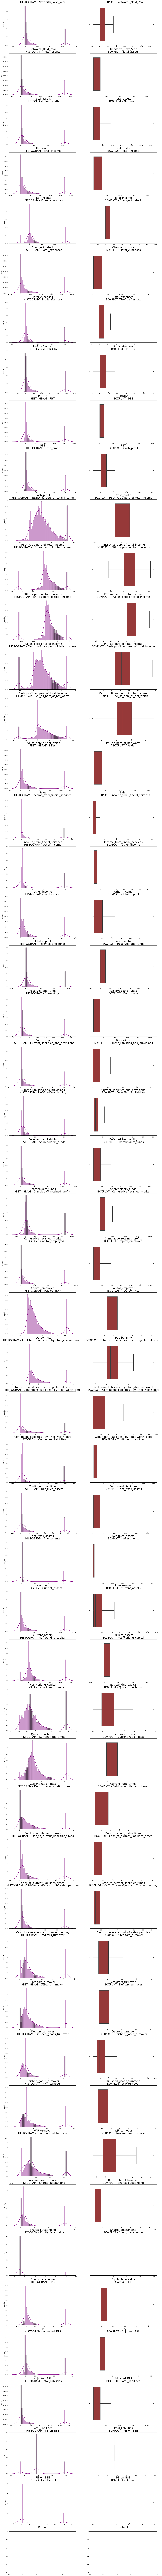

In [149]:
col_names = list(Company)
col_names.remove('Num')


fig, axs=plt.subplots(nrows= 52, ncols= 2, squeeze=True, figsize=(20,350))

for i, col_val in enumerate(col_names):
    
    # HISTOGRAM
    sns.distplot(Company[col_val], kde=True, bins=50, hist_kws=dict(ec='black'), ax=axs[i][0], color='purple')
    axs[i][0].set_title('HISTOGRAM - {}'.format(col_val), fontsize=20)
    axs[i][0].set_xlabel(col_val, fontsize=20)
    
    # BOXPLOT
    sns.boxplot(Company[col_val], ax=axs[i][1], color='brown')
    axs[i][1].set_title('BOXPLOT - {}'.format(col_val), fontsize=20)
    axs[i][1].set_xlabel(col_val, fontsize=20)
    
plt.show()

In [97]:
col_names = list(Company)
col_names.remove('Num')

fig, ax = plt.subplots(nrows= 52, figsize=(20,400))
i = 0
for i, col_val in enumerate(col_names):
    
    # BOXPLOT
    
    sns.boxplot(x = Company[col_val], y = Company["Default"] , ax=ax[i], orient='h')

    ax[i].set_title('BOXPLOT - {}'.format(col_val), fontsize=14)
    ax[i].set_ylabel("Default", fontsize=14)


plt.show()

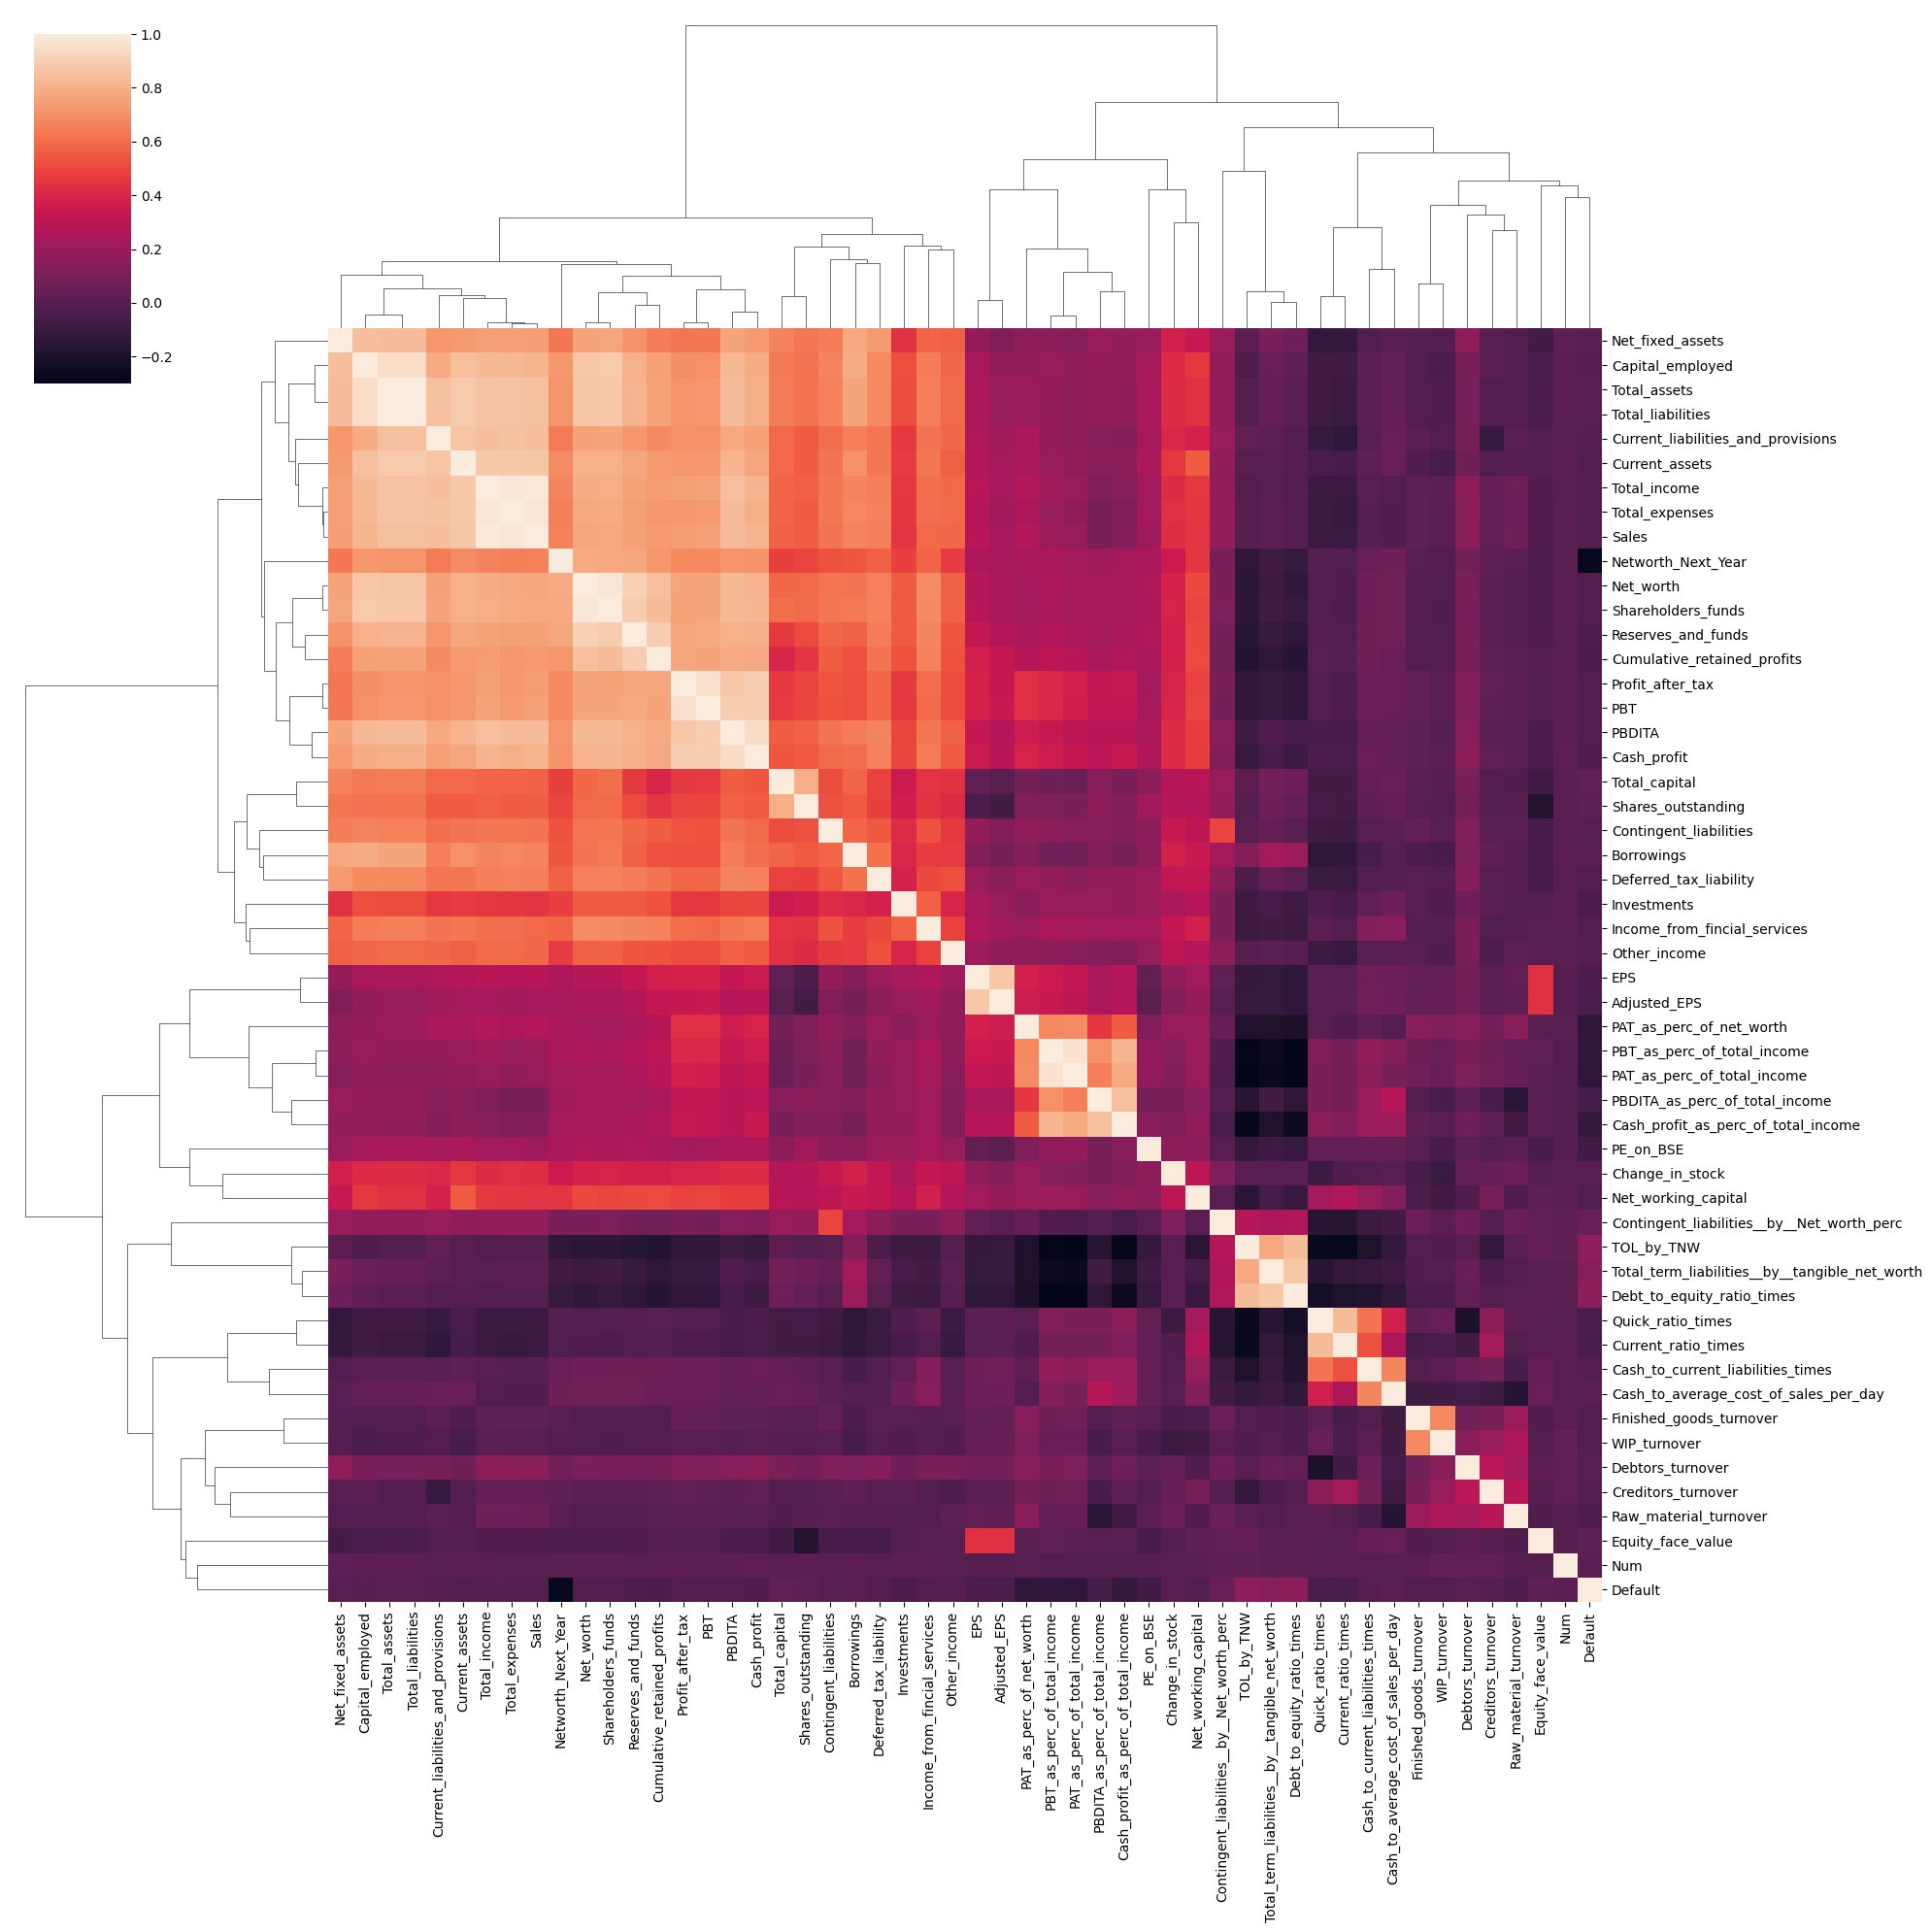

In [98]:
sns.clustermap(Company.corr(),figsize=(20,20))

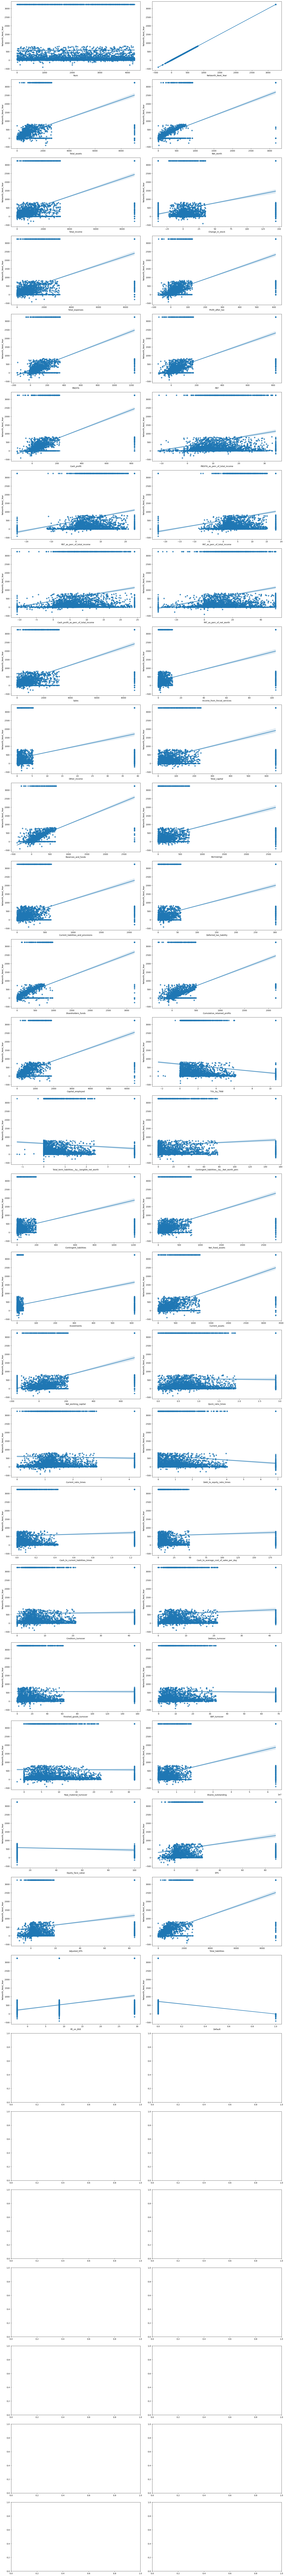

In [101]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.regplot(x = Company[col], y = Company['Networth_Next_Year'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

In [14]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
check_outlier(Company['Networth_Next_Year'])

(-486.29999999999995, 821.0999999999999)

In [16]:
check_outlier(Company['PBT_as_perc_of_total_income'])

(-11.663750000000002, 21.066250000000004)

In [17]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [18]:
for i in Company:
    Company[i]=treat_outlier(Company[i])

213.75 1064.75 3192.25 4043.25 <built-in function min> <built-in function max>
-0.4 3.975 330.825 3233.9500000000003 <built-in function min> <built-in function max>
11.0 91.3 1120.8 9032.15 <built-in function min> <built-in function max>
2.8 31.475 389.85 3161.6 <built-in function min> <built-in function max>
6.574999999999999 121.2 1387.9 8943.7 <built-in function min> <built-in function max>
-38.7 -0.7 13.625 144.625 <built-in function min> <built-in function max>
3.9 105.125 1326.4 8656.475 <built-in function min> <built-in function max>
-13.725 0.6 50.45 609.075 <built-in function min> <built-in function max>
-0.4 7.3 146.1 1237.675 <built-in function min> <built-in function max>
-15.0 1.0 70.025 819.775 <built-in function min> <built-in function max>
-5.6 3.2 90.85 825.4000000000001 <built-in function min> <built-in function max>
-1.2349999999999999 5.03 16.2425 34.27 <built-in function min> <built-in function max>
-23.737499999999997 0.61 8.7925 23.6275 <built-in function min> <b

<AxesSubplot:>

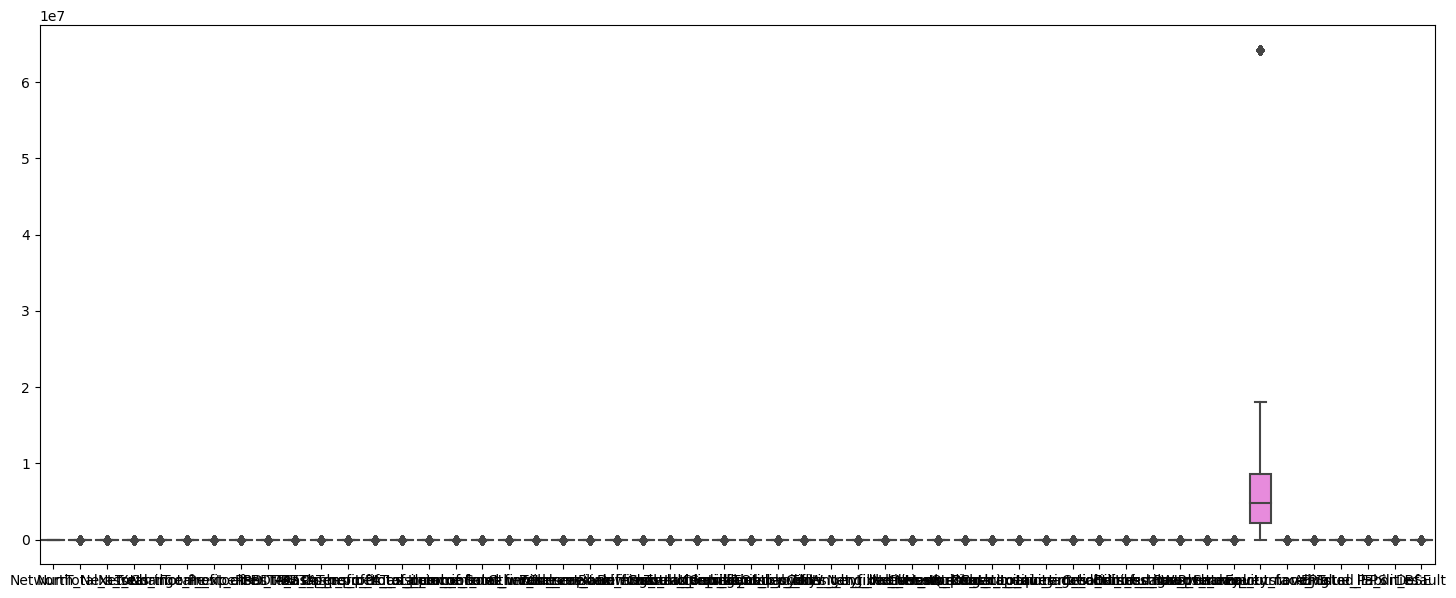

In [144]:
import seaborn as sns
from matplotlib.pyplot import figure
#sns.set_theme(style="whitegrid")
figure(figsize=(18,7))
sns.boxplot(data=Company)

In [19]:
Company.shape

(4256, 51)

In [20]:
for i in range(len(Company)):
    if Company.loc[i,"Networth_Next_Year"] <= 0:
        Company.loc[i,"Default"] = 1
    else:
        Company.loc[i,"Default"] = 0

In [21]:
Company[["Networth_Next_Year","Default"]]

Networth_Next_Year  Default
0                 395.30      0.0
1                  36.20      0.0
2                  84.00      0.0
3                3233.95      0.0
4                  41.80      0.0
...                  ...      ...
4251                0.20      0.0
4252               93.30      0.0
4253             3233.95      0.0
4254               64.60      0.0
4255                0.00      1.0

[4256 rows x 2 columns]

In [22]:
Company['PBT_as_perc_of_total_income'].describe()

count    4256.000000
mean        3.943896
std        10.154594
min       -23.737500
25%         0.610000
50%         3.340000
75%         8.792500
max        23.627500
Name: PBT_as_perc_of_total_income, dtype: float64

In [23]:
Company.loc[Company['Default'] == 0,'PBT_as_perc_of_total_income'].describe()

count    3352.000000
mean        4.617543
std         9.410204
min       -23.737500
25%         0.877500
50%         3.490000
75%         9.020000
max        23.627500
Name: PBT_as_perc_of_total_income, dtype: float64

In [24]:
import statsmodels.formula.api as SM

In [25]:
X = Company.drop(['Default','Networth_Next_Year','Num'], axis=1)
y = Company['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0,stratify=Company['Default'])

Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

Company_train.to_csv('Company_train.csv',index=False)
Company_test.to_csv('Company_test.csv',index=False)

In [26]:
Company_train.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_by_TNW', 'Total_term_liabilities__by__tangible_net_worth',
       'Contingent_liabilities__by__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_

In [27]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

variables        VIF
3                                  Change_in_stock   1.603596
44                               Equity_face_value   1.966285
48                                       PE_on_BSE   2.154782
27      Contingent_liabilities__by__Net_worth_perc   2.203155
30                                     Investments   2.207894
16                                    Other_income   2.261870
32                             Net_working_capital   2.379951
38                              Creditors_turnover   2.540257
39                                Debtors_turnover   2.558372
42                           Raw_material_turnover   2.587339
37           Cash_to_average_cost_of_sales_per_day   2.767914
40                         Finished_goods_turnover   2.923003
15                    Income_from_fincial_services   3.141681
21                          Deferred_tax_liability   3.163053
13                        PAT_as_perc_of_net_worth   3.166540
41                                    WIP_turnover   3.446715
28                          Contingent_liabilities   3.626510
36               Cash_to_current_liabilities_times   3.809235
19                                      Borrowings   4.809833
43                              Shares_outstanding   4.885363
17                                   Total_capital   5.523716
46                                    Adjusted_EPS   5.565264
45                                             EPS   6.032277
29                                Net_fixed_assets   6.849404
25                                      TOL_by_TNW   6.930726
26  Total_term_liabilities__by__tangible_net_worth   7.457973
23                     Cumulative_retained_profits   7.972231
20              Current_liabilities_and_provisions   8.644505
9                   PBDITA_as_perc_of_total_income   9.988008
35                      Debt_to_equity_ratio_times  10.793281
12             Cash_profit_as_perc_of_total_income  10.840140
34                             Current_ratio_times  12.041647
33                               Quick_ratio_times  12.122619
18                              Reserves_and_funds  12.136285
31                                  Current_assets  12.871627
8                                      Cash_profit  17.659113
5                                 Profit_after_tax  18.875349
11                     PAT_as_perc_of_total_income  18.907879
6                                           PBDITA  19.050463
7                                              PBT  19.167592
24                                Capital_employed  20.604434
10                     PBT_as_perc_of_total_income  23.121640
1                                        Net_worth  54.790461
22                              Shareholders_funds  54.891717
2                                     Total_income  56.591396
4                                   Total_expenses  63.959442
14                                           Sales  64.698122
47                               Total_liabilities        inf
0                                     Total_assets        inf

In [29]:
f_1 = 'Default ~ Change_in_stock + Equity_face_value + PE_on_BSE + Investments + Contingent_liabilities__by__Net_worth_perc + Other_income + Net_working_capital + Creditors_turnover + Debtors_turnover + Raw_material_turnover + Cash_to_average_cost_of_sales_per_day + Finished_goods_turnover + Income_from_fincial_services + Deferred_tax_liability + PAT_as_perc_of_net_worth + WIP_turnover + Contingent_liabilities + Cash_to_current_liabilities_times + Shares_outstanding'


In [30]:
model_1 = SM.logit(formula = f_1, data=Company).fit()

Optimization terminated successfully.
         Current function value: 0.502228
         Iterations 5


In [31]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 4256
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                           19
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                 0.02881
Time:                        23:42:53   Log-Likelihood:                -2137.5
converged:                       True   LL-Null:                       -2200.9
Covariance Type:            nonrobust   LLR p-value:                 5.818e-18
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.1581      0.090    -12.798      0.000      -1.335      -0.981
Change_in_stock                                0.0011      0.001      1.365      0.172      -0.000       0.003
Equity_face_value                              0.0018      0.002      1.201      0.230      -0.001       0.005
PE_on_BSE                                     -0.0171      0.004     -4.178      0.000      -0.025      -0.009
Investments                                   -0.0004      0.000     -1.999      0.046      -0.001   -8.11e-06
Contingent_liabilities__by__Net_worth_perc     0.0024      0.001      2.587      0.010       0.001       0.004
Other_income                                   0.0005      0.003      0.141      0.888      -0.006       0.007
Net_working_capital                         5.386e-05      0.000      0.284      0.776      -0.000       0.000
Creditors_turnover                             0.0016      0.004      0.447      0.655      -0.005       0.008
Debtors_turnover                               0.0045      0.003      1.277      0.202      -0.002       0.011
Raw_material_turnover                         -0.0048      0.005     -0.957      0.338      -0.015       0.005
Cash_to_average_cost_of_sales_per_day          0.0011      0.001      1.334      0.182      -0.001       0.003
Finished_goods_turnover                        0.0004      0.001      0.398      0.691      -0.002       0.003
Income_from_fincial_services                   0.0011      0.001      0.769      0.442      -0.002       0.004
Deferred_tax_liability                        -0.0001      0.000     -0.220      0.826      -0.001       0.001
PAT_as_perc_of_net_worth                      -0.0180      0.002     -8.074      0.000      -0.022      -0.014
WIP_turnover                                  -0.0011      0.003     -0.407      0.684      -0.007       0.004
Contingent_liabilities                        -0.0001      0.000     -0.956      0.339      -0.000       0.000
Cash_to_current_liabilities_times             -0.1407      0.134     -1.050      0.294      -0.403       0.122
Shares_outstanding                          5.921e-09   2.22e-09      2.665      0.008    1.57e-09    1.03e-08
==============================================================================================================
"""

In [32]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.020177824468524563


In [33]:
f_2 = 'Default ~ PE_on_BSE + Investments + Contingent_liabilities__by__Net_worth_perc + PAT_as_perc_of_net_worth + Shares_outstanding'


In [34]:
model_2 = SM.logit(formula = f_2, data=Company_train).fit()

Optimization terminated successfully.
         Current function value: 0.501242
         Iterations 5


In [35]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2973
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                 0.03092
Time:                        23:42:53   Log-Likelihood:                -1493.2
converged:                       True   LL-Null:                       -1540.8
Covariance Type:            nonrobust   LLR p-value:                 5.213e-19
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.0835      0.072    -15.020      0.000      -1.225      -0.942
PE_on_BSE                                     -0.0170      0.005     -3.529      0.000      -0.027      -0.008
Investments                                   -0.0004      0.000     -2.020      0.043      -0.001    -1.3e-05
Contingent_liabilities__by__Net_worth_perc     0.0023      0.001      2.459      0.014       0.000       0.004
PAT_as_perc_of_net_worth                      -0.0186      0.003     -7.364      0.000      -0.024      -0.014
Shares_outstanding                          6.187e-09    2.3e-09      2.693      0.007    1.68e-09    1.07e-08
==============================================================================================================
"""

In [36]:
f_3 = 'Default ~ PE_on_BSE + Contingent_liabilities__by__Net_worth_perc + PAT_as_perc_of_net_worth + Shares_outstanding'

In [37]:
model_3 = SM.logit(formula = f_3, data=Company_train).fit()

Optimization terminated successfully.
         Current function value: 0.501947
         Iterations 5


In [38]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                 0.02956
Time:                        23:42:53   Log-Likelihood:                -1495.3
converged:                       True   LL-Null:                       -1540.8
Covariance Type:            nonrobust   LLR p-value:                 7.762e-19
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.0978      0.072    -15.315      0.000      -1.238      -0.957
PE_on_BSE                                     -0.0181      0.005     -3.785      0.000      -0.027      -0.009
Contingent_liabilities__by__Net_worth_perc     0.0022      0.001      2.382      0.017       0.000       0.004
PAT_as_perc_of_net_worth                      -0.0192      0.003     -7.643      0.000      -0.024      -0.014
Shares_outstanding                          4.734e-09   2.18e-09      2.167      0.030    4.53e-10    9.02e-09
==============================================================================================================
"""

In [39]:
calc_vif(X_train[['PE_on_BSE','Contingent_liabilities__by__Net_worth_perc','PAT_as_perc_of_net_worth','Shares_outstanding']]).sort_values(by='VIF', ascending = True)

variables       VIF
1  Contingent_liabilities__by__Net_worth_perc  1.258342
2                    PAT_as_perc_of_net_worth  1.259171
3                          Shares_outstanding  1.472084
0                                   PE_on_BSE  1.501321

In [40]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.027673312147710516


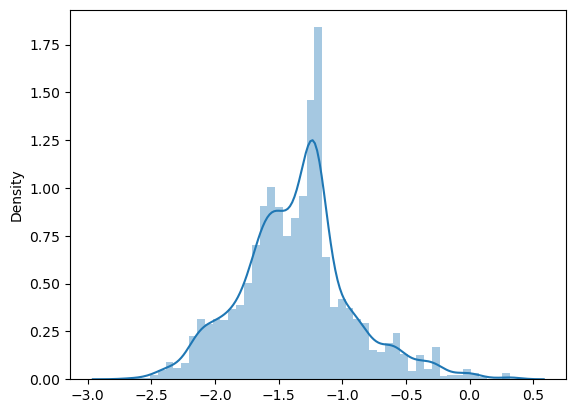

In [41]:
sns.distplot(model_2.fittedvalues);

In [42]:
y_predict_train = model_2.predict(X_train)
y_predict_train

2372    0.327575
2238    0.230436
1266    0.165316
2438    0.139678
1412    0.437170
          ...   
1354    0.229469
3095    0.161553
665     0.231061
3533    0.226347
2569    0.172172
Length: 2979, dtype: float64

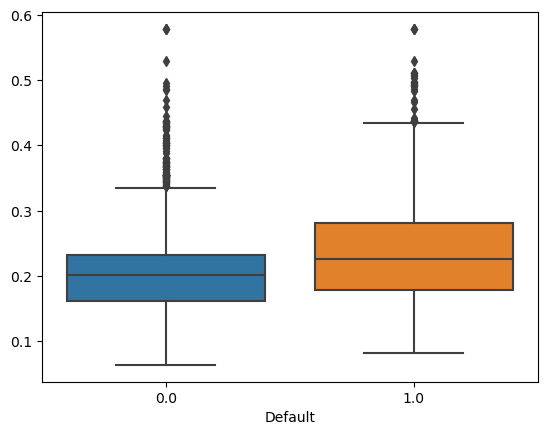

In [43]:
sns.boxplot(x=Company['Default'],y=y_predict_train)
plt.xlabel('Default');

In [56]:
y_prob_pred_train = model_3.predict(Company_train)
y_prob_pred_train

2372    0.320327
2238    0.225709
1266    0.160050
2438    0.168006
1412    0.433306
          ...   
1354    0.222821
3095    0.155701
665     0.225709
3533    0.222621
2569    0.164850
Length: 2979, dtype: float64

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Company_train['Default'], y_prob_pred_train)

In [58]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.22488179468804292

In [59]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

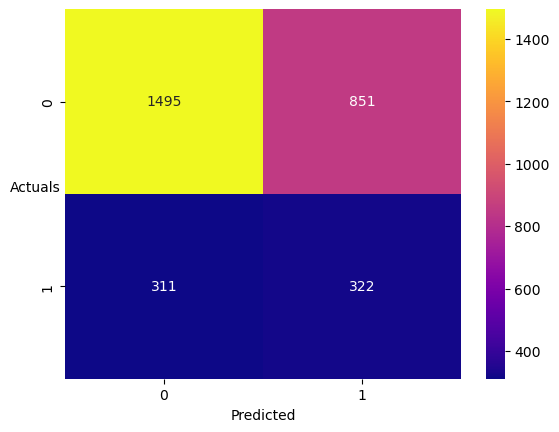

In [60]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [61]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1495 
False Positives: 851 
False Negatives: 311 
True Positives: 322


In [62]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.828     0.637     0.720      2346
         1.0      0.275     0.509     0.357       633

    accuracy                          0.610      2979
   macro avg      0.551     0.573     0.538      2979
weighted avg      0.710     0.610     0.643      2979



Area under Curve (AUC) is: 0.600


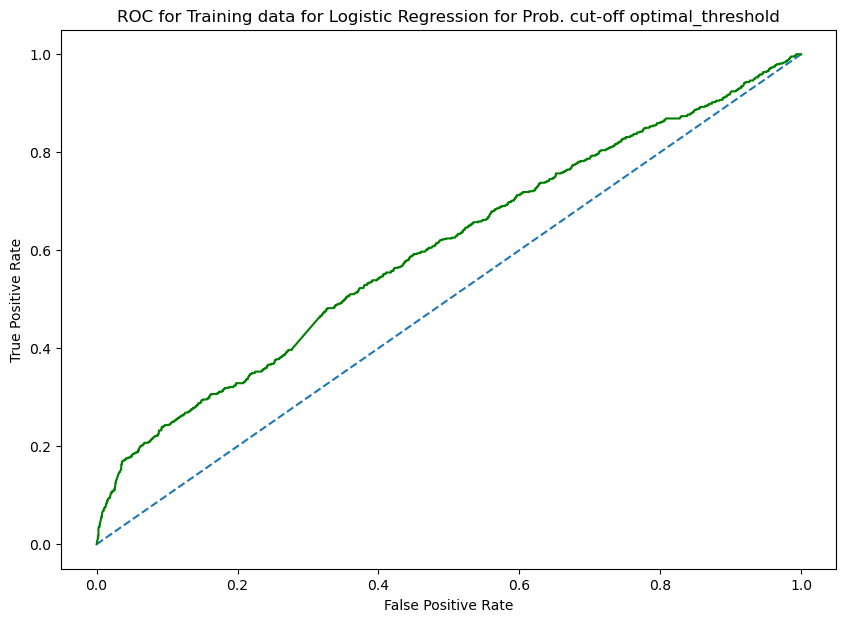

In [65]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
#probs_LOG = bestmodel_LOG.predict_proba(X_train)
#probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_train_auc = roc_auc_score(Company_train['Default'], y_prob_pred_train)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
# calculate roc curve
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(Company_train['Default'], y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Training data for Logistic Regression for Prob. cut-off optimal_threshold')
plt.show()

In [87]:
y_prob_pred_test = model_3.predict(X_test)
y_prob_pred_test

3137    0.178020
2363    0.105589
1076    0.503365
4070    0.227887
2611    0.268841
          ...   
2776    0.246648
588     0.164113
3865    0.205201
2972    0.120818
980     0.220741
Length: 1277, dtype: float64

In [88]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

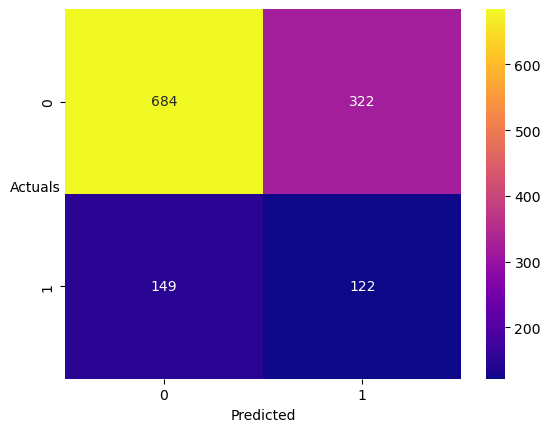

In [89]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [90]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 684 
False Positives: 322 
False Negatives: 149 
True Positives: 122


In [91]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.821     0.680     0.744      1006
         1.0      0.275     0.450     0.341       271

    accuracy                          0.631      1277
   macro avg      0.548     0.565     0.543      1277
weighted avg      0.705     0.631     0.658      1277



Area under Curve (AUC) is: 0.584


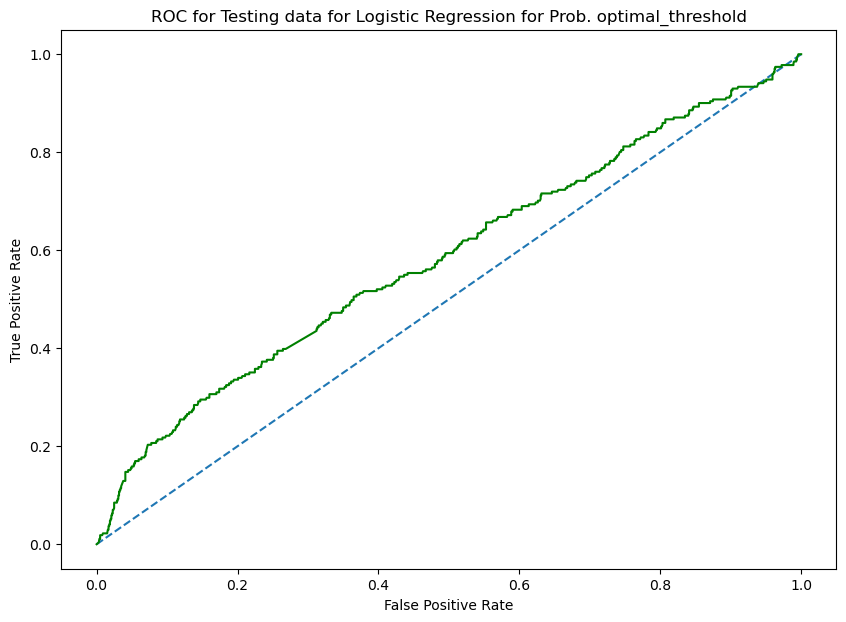

In [92]:
#from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
#probs_LOG = bestmodel_LOG.predict_proba(X_train)
#probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_test_auc = roc_auc_score(Company_test['Default'], y_prob_pred_test)
print('Area under Curve (AUC) is: %.3f' % LOG_test_auc)
# calculate roc curve
LOG_test_fpr, LOG_test_tpr, LOG_test_thresholds = roc_curve(Company_test['Default'], y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_test_fpr, LOG_test_tpr,color='green')
plt.title('ROC for Testing data for Logistic Regression for Prob. optimal_threshold')
plt.show()

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [131]:
param_grid={
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,50]
}
rfcl=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid)

In [132]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [133]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 45,
 'n_estimators': 50}

In [134]:
best_grid=grid_search.best_estimator_

In [135]:
predict_train_rf=best_grid.predict(X_train)
predict_test_rf=best_grid.predict(X_test)

In [136]:
print(metrics.classification_report(y_train,predict_train_rf,digits=3))

              precision    recall  f1-score   support

         0.0      0.818     0.984     0.894      2346
         1.0      0.764     0.190     0.304       633

    accuracy                          0.815      2979
   macro avg      0.791     0.587     0.599      2979
weighted avg      0.807     0.815     0.768      2979



In [137]:
print(metrics.classification_report(y_test,predict_test_rf,digits=3))

              precision    recall  f1-score   support

         0.0      0.801     0.974     0.879      1006
         1.0      0.519     0.103     0.172       271

    accuracy                          0.789      1277
   macro avg      0.660     0.539     0.526      1277
weighted avg      0.741     0.789     0.729      1277



AUC: 0.963


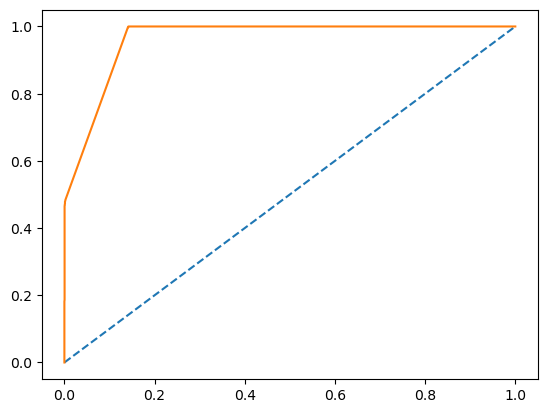

In [139]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.963


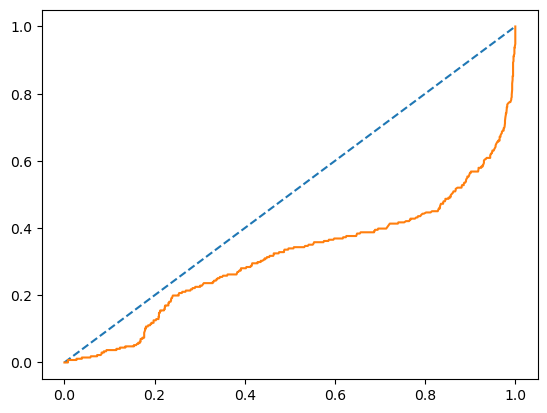

In [140]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);